In [6]:
import math
import scipy.signal as signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Import recorded raw data

In [7]:

keyword = 'fast'

# Load row data into pandas
df_acc = pd.read_csv("data/raw-acc-"+keyword+".csv", names =['time', 'accX', 'accY', 'accZ', 'accuracy'])
df_acc['accScalar'] = np.sqrt(df_acc.accX*df_acc.accX + df_acc.accY*df_acc.accY + df_acc.accZ*df_acc.accZ)  
df_rot = pd.read_csv("data/raw-rot-"+keyword+".csv", names =['time', 'rotX', 'rotY', 'rotZ','rotScalar', 'accuracy'])

#Convert time in ms
init_time = min(df_acc.time[0], df_rot.time[0]) 
df_acc.time = (df_acc.time - init_time)/1e6
df_rot.time = (df_rot.time - init_time)/1e6

In [8]:
df_rot['scal'] = np.sqrt(df_rot.rotX*df_rot.rotX + df_rot.rotY*df_rot.rotY + df_rot.rotZ*df_rot.rotZ)  

print(df_rot['scal'] -df_rot.rotScalar)

0       -0.716195
1       -0.730616
2       -0.741561
3       -0.750453
4       -0.757669
           ...   
13831   -0.849748
13832   -0.844424
13833   -0.838787
13834   -0.832412
13835         NaN
Length: 13836, dtype: float64




## Plot acceleration

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


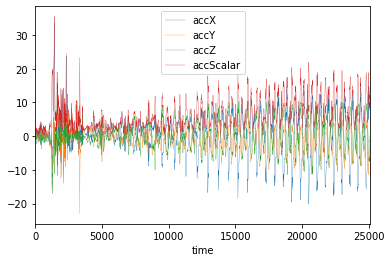

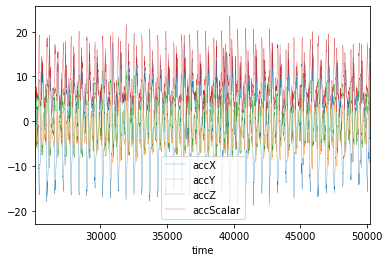

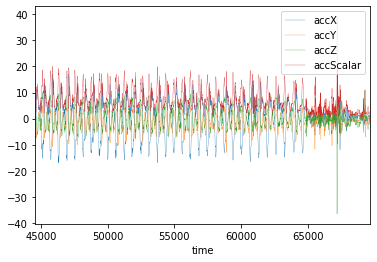

In [9]:
window_size=5000
n_windows = int(df_acc.time.size/window_size)+1

for i in range(n_windows):
    # Limit data to certain window
    df_part = df_acc.head(window_size*(1+i)).tail(window_size)
    df_part.plot(x = 'time', y=['accX', 'accY', 'accZ', 'accScalar'], kind = 'line', linewidth=0.3)
    plt.savefig('out/acc-'+keyword+str(i)+'.eps', format='eps')

## Plot rotation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


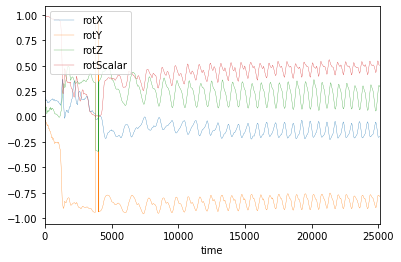

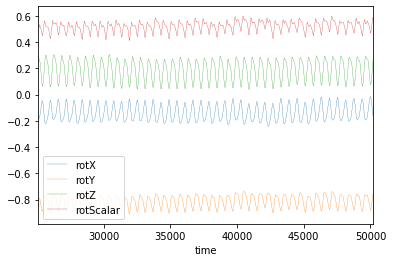

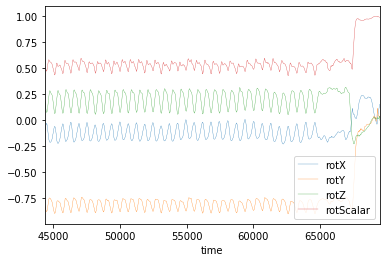

In [10]:
window_size=5000

n_windows = int(df_rot.time.size/window_size)+1

for i in range(n_windows):
    # Limit data to certain window
    df_part = df_rot.head(window_size*(1+i)).tail(window_size)
    df_part.plot(x = 'time', y=['rotX', 'rotY', 'rotZ', 'rotScalar'], kind = 'line', linewidth=0.3)
    plt.savefig('out/rot-'+keyword+str(i)+'.eps', format='eps')

0.0
0.0
5022.009103
5022.009103
10044.073312
10044.073312
15066.091255
15066.091255
20088.094429
20088.094429
25110.0463
25110.0463
30131.988439
30131.988439
35153.869587
35153.869587
40175.75069
40175.75069
45197.628916
45197.628916
50219.510019
50219.510019
55241.373312
55241.373312
60263.223898
60263.223898
64662.35104
64461.484341


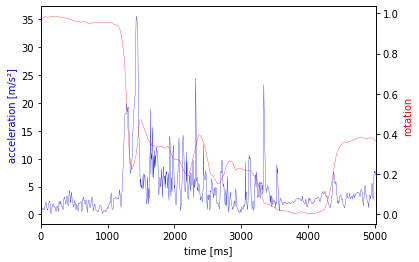

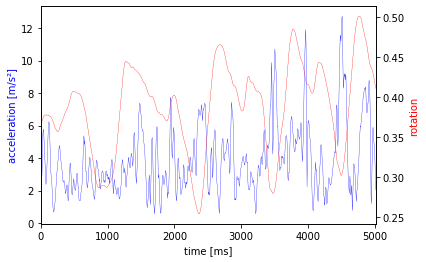

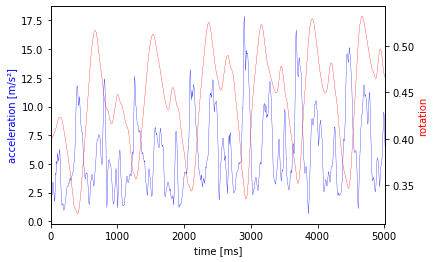

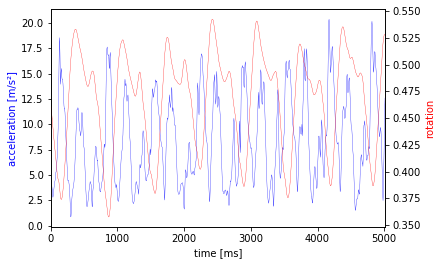

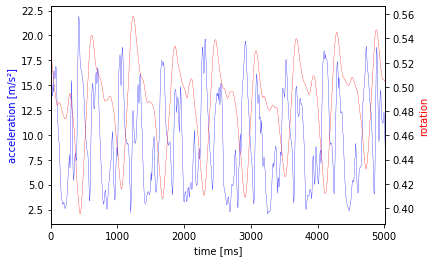

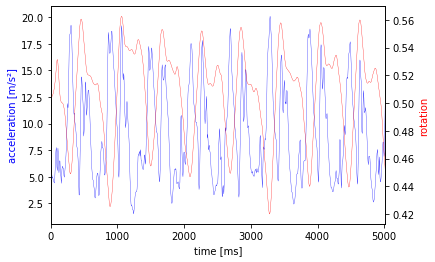

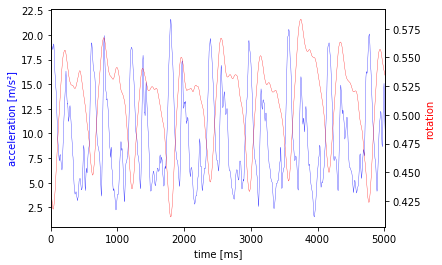

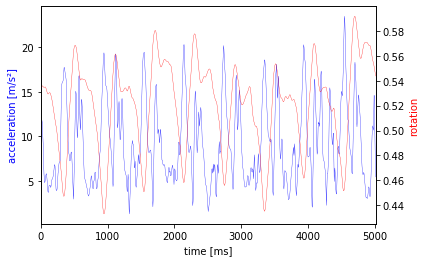

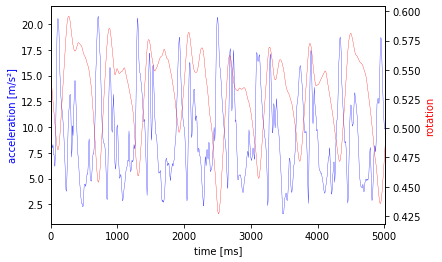

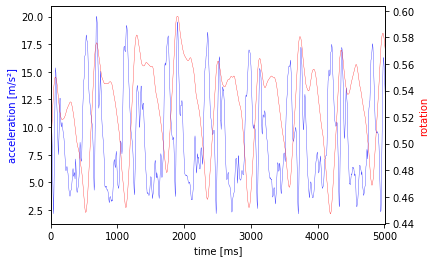

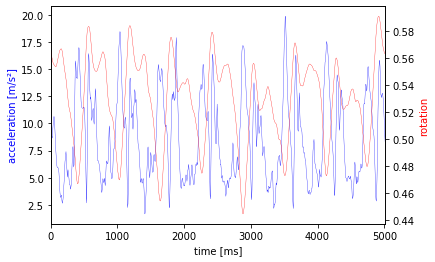

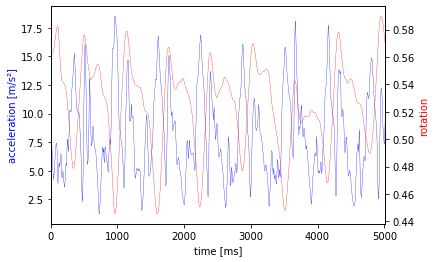

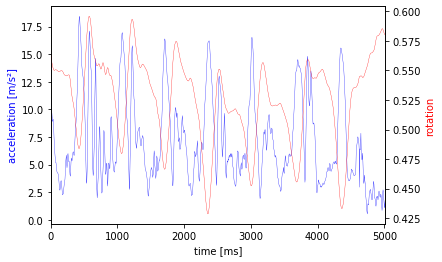

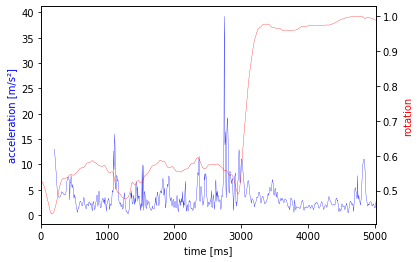

In [11]:
n=70
b = [1.0 / n] * n
a = 1

#df_acc['filtered'] = signal.lfilter(b,a,df_acc['accScalar'])
df_acc['acceleration'] = df_acc['accScalar']

df_rot['rotation'] = df_rot['rotScalar']

## Plot rotation
window_size=1000

n_windows = int(df_rot.time.size/window_size)+1

for i in range(n_windows):
    df_rot_part = df_rot.head(window_size*(1+i)).tail(window_size)
    df_acc_part = df_acc.head(window_size*(1+i)).tail(window_size)
    
    # set time to start with 0
    print(df_acc_part.time.iloc[0])
    print(df_rot_part.time.iloc[0])
    start_time = min(df_acc_part.time.iloc[0], df_rot_part.time.iloc[0])
    df_acc_part.time = df_acc_part.time-start_time
    df_rot_part.time = df_rot_part.time-start_time
    
    ax = df_acc_part.plot(x = 'time', y='acceleration', color ='b', kind = 'line', linewidth=0.3, legend=None)
    ax.set_ylabel('acceleration [m/s²]', color='b')
    ax.set_xlabel('time [ms]')

    
    ax1 = ax.twinx()
    
    df_rot_part.plot(x='time', y='rotation', color='r', ax=ax1, linewidth=0.3, legend=None)
    ax1.set_ylabel('rotation', color='r')
    
    plt.savefig('out/comparision-'+keyword+str(i)+'.eps', format='eps')